In [2]:
#importing modules and packages
import pandas as pd
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
#loading and cleaning Data
titanic_dataset = pd.read_csv("train.csv")
titanic_dataset.shape
titanic_dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [4]:
titanic_dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#Encoding Categorial Columns
le = preprocessing.LabelEncoder()
titanic_dataset['Sex'] = le.fit_transform(titanic_dataset['Sex'])
titanic_dataset['Embarked'] = le.fit_transform(titanic_dataset['Embarked'])

In [6]:
#Eleminating unwanted features
work_ds = titanic_dataset[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch','Fare', 'Embarked']]
para_list = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [7]:
#function
def naive_bayes(Parameter_list):
    DV = []
    AS =[]
    for feature in Parameter_list:
        y = work_ds[feature]
        X= work_ds.drop([feature], axis=1)
        X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
        clf = BernoulliNB()
        y_pred = clf.fit(X_train,y_train).predict(X_test)
        Acc_score = accuracy_score(y_test,y_pred,normalize=True)
        print(f"DV = {feature} , Accuracy = {Acc_score}")
        print(confusion_matrix(y_test,y_pred))
        print("\n")
        DV.append(feature)
        AS.append(Acc_score)
        
   
    df = pd.DataFrame ({'Dependent Feature':  DV, 'Accuracy Score': AS })
    return df

In [8]:
result = naive_bayes(para_list)
result

DV = Survived , Accuracy = 0.7715355805243446
[[131  26]
 [ 35  75]]


DV = Pclass , Accuracy = 0.5917602996254682
[[ 30   8  32]
 [  9  10  30]
 [ 24   6 118]]


DV = Sex , Accuracy = 0.7453183520599251
[[ 49  49]
 [ 19 150]]


DV = SibSp , Accuracy = 0.6891385767790262
[[162  20   0   0   0   0   0]
 [ 43  22   0   0   0   0   0]
 [  6   2   0   0   0   0   0]
 [  5   2   0   0   0   0   0]
 [  2   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0]]


DV = Parch , Accuracy = 0.7153558052434457
[[182  16   0   0   0]
 [ 31   9   0   0   0]
 [ 24   3   0   0   0]
 [  1   0   0   0   0]
 [  1   0   0   0   0]]


DV = Embarked , Accuracy = 0.7340823970037453
[[  0   0  49]
 [  0   0  22]
 [  0   0 196]]




,Dependent Feature,Accuracy Score
0,Survived,0.771536
1,Pclass,0.591760
2,Sex,0.745318
3,SibSp,0.689139
4,Parch,0.715356
5,Embarked,0.734082


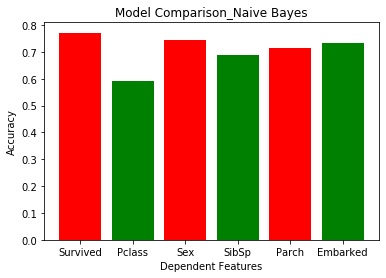

In [9]:
import matplotlib.pyplot as plt
plt.bar(result['Dependent Feature'], result['Accuracy Score'],color = ['red', 'green'])
plt.xlabel('Dependent Features') 
plt.ylabel('Accuracy') 
plt.title('Model Comparison_Naive Bayes') 
plt.show()

In [10]:
max = result['Accuracy Score'].max()
best_model = result.loc[result['Accuracy Score'] == max]
print(f"The best model with naive_bayes alogrithm is generated for DV as {best_model['Dependent Feature'].to_string(index = False)} with a model accuracy of {best_model['Accuracy Score'].to_string(index = False)}")

The best model with naive_bayes alogrithm is generated for DV as  Survived with a model accuracy of  0.771536
